# Pima Indian Diabetes

# Problem Statement

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



In [1]:
#Import the necessary lib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\BORN 2 CODE\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#rows and columns 
df.shape

(768, 9)

In [5]:
list(df.columns) 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#statistical info
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#checking the Null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

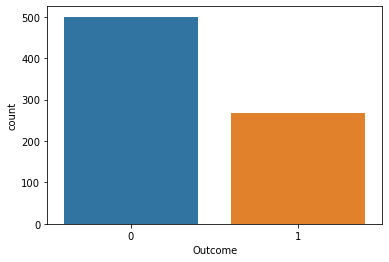

In [9]:
sns.countplot(x='Outcome',data=df)

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Correlation

In [11]:
correlation = df.corr()

<AxesSubplot:>

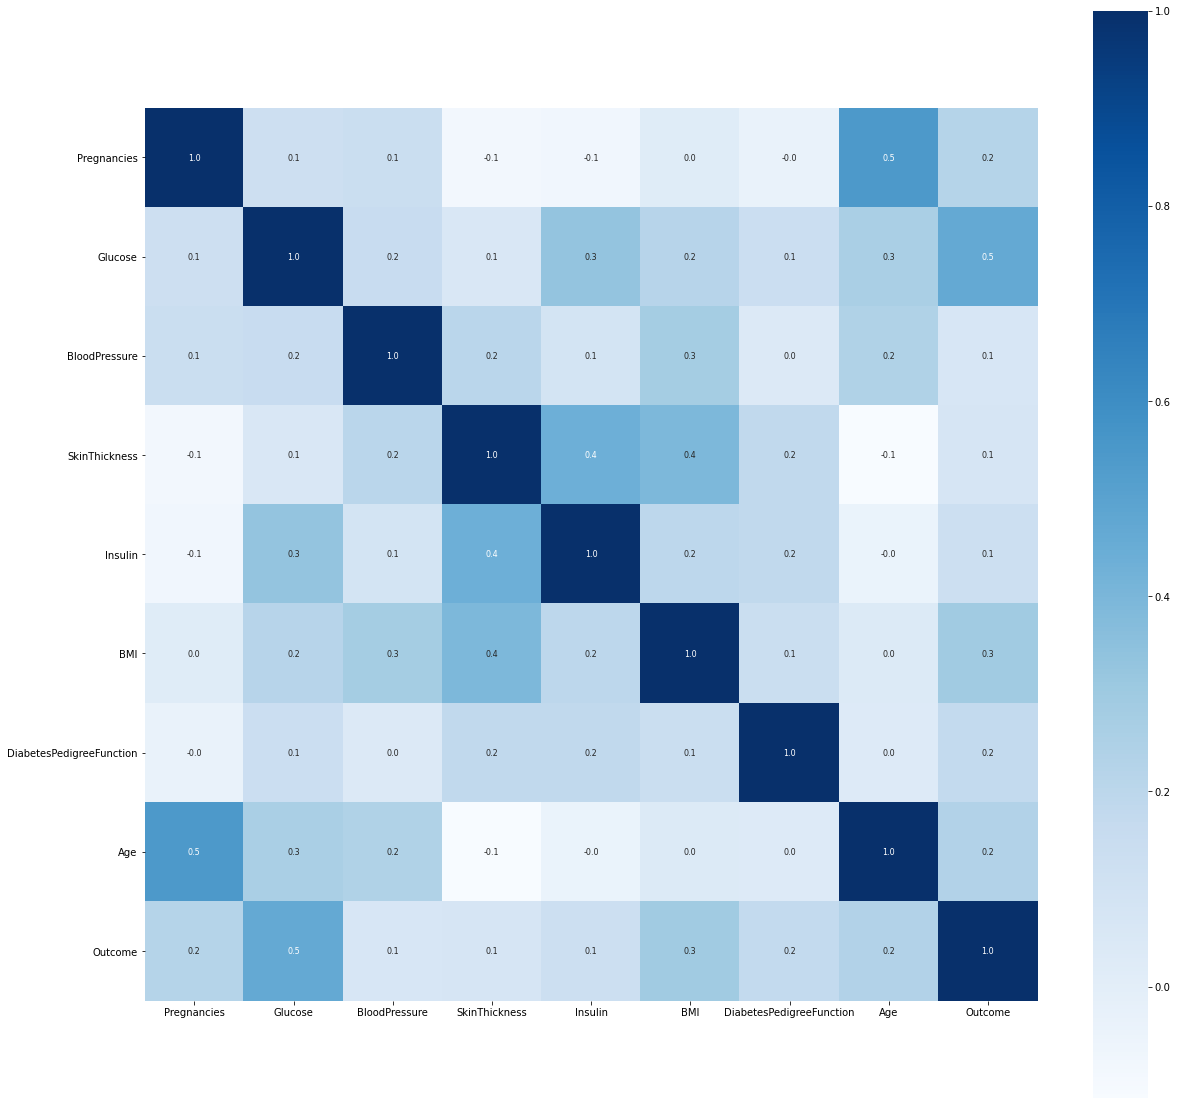

In [12]:
#construct the heatmap to understand the correlation between the columns
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
print(df.corr()['Outcome'].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


Here we see that Glucose is highly correlated with Outcome

# Visualisation

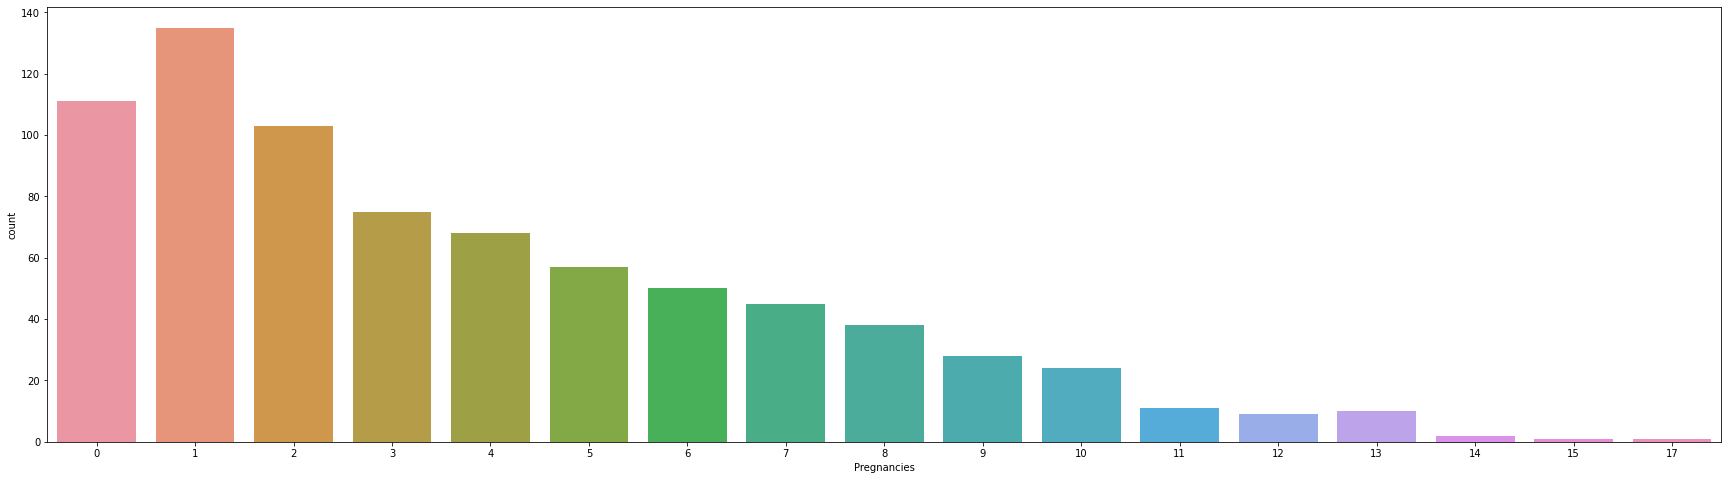

In [14]:
#Pregnancy column
plt.figure(figsize=(30,8))
sns.countplot(x='Pregnancies', data=df)
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


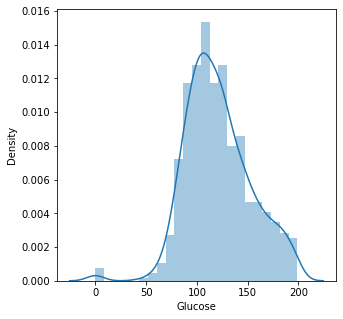

In [15]:
#Glucose distribution
plt.figure(figsize=(5,5))
sns.distplot(df['Glucose'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


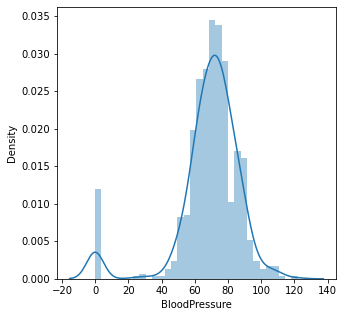

In [16]:
#Blood Pr distribution
plt.figure(figsize=(5,5))
sns.distplot(df['BloodPressure'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


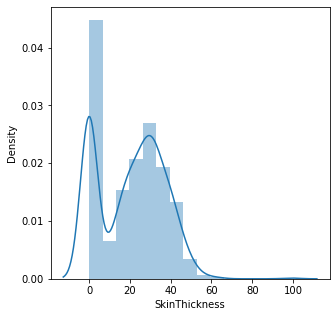

In [17]:
#Skin Thickness distribution
plt.figure(figsize=(5,5))
sns.distplot(df['SkinThickness'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


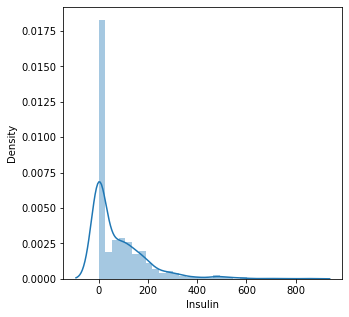

In [18]:
#Insulin distribution
plt.figure(figsize=(5,5))
sns.distplot(df['Insulin'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


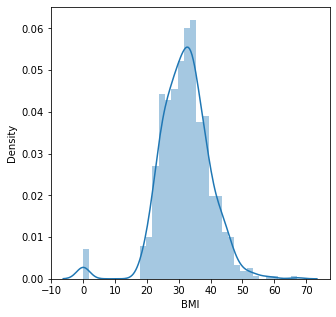

In [19]:
#BMI distribution
plt.figure(figsize=(5,5))
sns.distplot(df['BMI'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


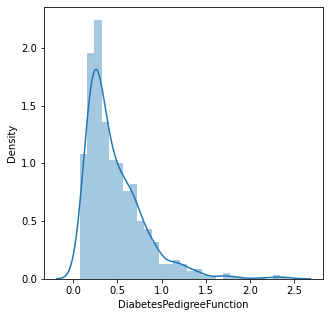

In [20]:
#DiabetesPedigreeFunction distribution
plt.figure(figsize=(5,5))
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()

C:\Users\BORN 2 CODE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


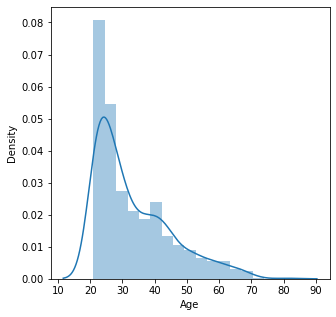

In [21]:
#Age distribution
plt.figure(figsize=(5,5))
sns.distplot(df['Age'])
plt.show()

In [22]:
#Removing the Unnessasary column
X = df.drop(['Pregnancies','BloodPressure','SkinThickness','Outcome'], axis=1)
Y = df.iloc[:,-1]

In [23]:
#Splitting the Data set into Train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


In [24]:
X_train.shape

(614, 5)

In [25]:
X_test.shape

(154, 5)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[ 0.91569367,  0.3736349 ,  0.37852648,  0.67740401,  1.69955804],
       [-0.75182191, -0.69965674, -0.50667229, -0.07049698, -0.96569189],
       [ 1.38763205,  5.09271083,  2.54094063, -0.11855487, -0.88240283],
       ...,
       [-0.84620959, -0.69965674, -0.94927168, -0.95656442, -1.04898095],
       [-1.12937261, -0.69965674, -0.26640405, -0.50001442,  0.11706589],
       [ 0.47521786, -0.69965674, -4.07275877,  0.52121586,  2.94889395]])

# Model Building

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski')
#N_neighbors is 25 because for X_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e, distance
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

In [36]:
#Predicting the data
knn_Y_pred = knn.predict(X_test)

In [37]:
knn_Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

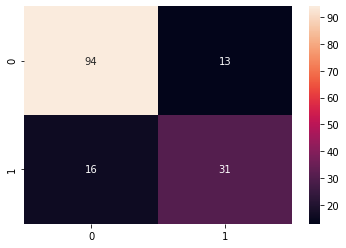

In [38]:
#confusion Matrix-To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(Y_test,knn_Y_pred)
sns.heatmap(knn_cm, annot=True)

In [39]:
#The above heatmap says 0,0 means True negative and 1,1 means True positive 
#0,1 means person is negative but showing result positive 
#1,0 means person is positive but shows negative so its danger so we need to accurate model 

In [40]:
print('Correct:' ,sum(knn_Y_pred==Y_test))
print('Incorrect:' ,sum(knn_Y_pred !=Y_test))
print('Accuracy:' ,sum(knn_Y_pred==Y_test)/len(knn_Y_pred))

Correct: 125
Incorrect: 29
Accuracy: 0.8116883116883117


In [42]:
#Verifying the accuracy using inbuilt methods 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn_Y_pred)

0.8116883116883117

# SVM

In [43]:
from sklearn.svm import SVC
svc=SVC(kernel='linear', random_state=0)
svc.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [44]:
svc_Y_pred = svc.predict(X_test)

In [45]:
svc_cm = confusion_matrix(Y_test,svc_Y_pred)
print(svc_cm)

[[96 11]
 [18 29]]


In [46]:
print('Correct:' ,sum(svc_Y_pred==Y_test))
print('Incorrect:' ,sum(svc_Y_pred !=Y_test))
print('Accuracy:' ,sum(svc_Y_pred==Y_test)/len(svc_Y_pred))

Correct: 125
Incorrect: 29
Accuracy: 0.8116883116883117


# Naive Bias 

In [47]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,Y_train)

GaussianNB()

In [48]:
nb_Y_pred = nb_classifier.predict(X_test)

In [49]:
nb_cm = confusion_matrix(nb_Y_pred,Y_test)
print(nb_cm)

[[94 21]
 [13 26]]


In [50]:
print('Correct:' ,sum(nb_Y_pred==Y_test))
print('Incorrect:' ,sum(nb_Y_pred !=Y_test))
print('Accuracy:' ,sum(nb_Y_pred==Y_test)/len(nb_Y_pred))

Correct: 120
Incorrect: 34
Accuracy: 0.7792207792207793


# Saving the model

In [57]:
import pickle 
pickle.dump(svc, open('classifier.pkl', 'wb'))

In [58]:
pickle.dump(sc, open('sc.pkl','wb'))